In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv('data/salaries.csv')

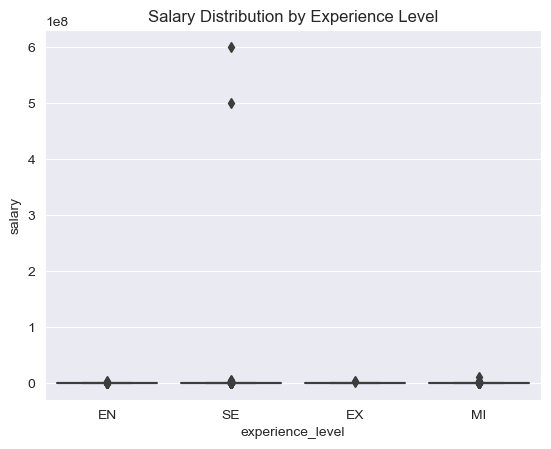

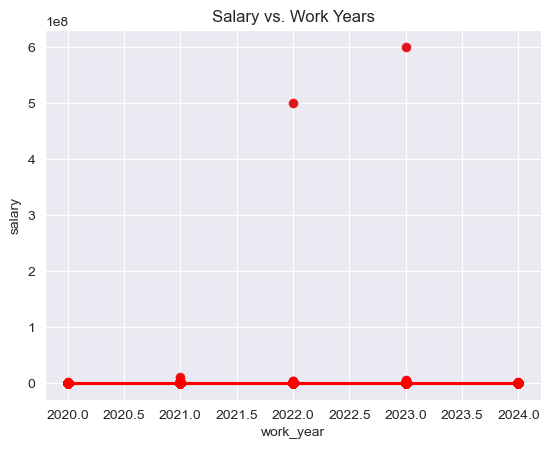

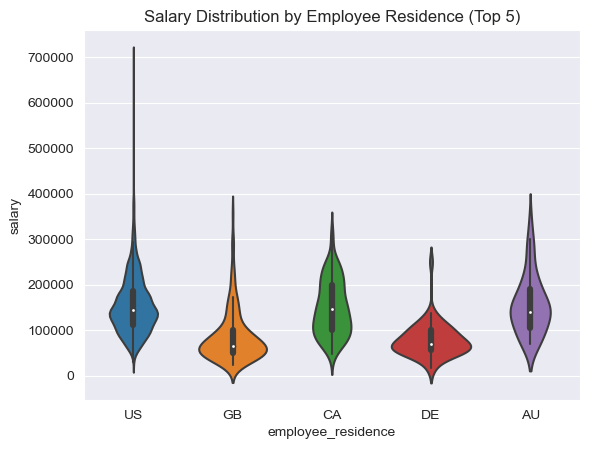

In [6]:
# Choose factors to visualize (examples):
factor1 = "experience_level"  # Categorical factor
factor2 = "work_year"  # Numerical factor
factor3 = "employee_residence"  # Categorical factor

# Visualize relationships:

# Boxplot for categorical factor
sns.boxplot(data=df, x=factor1, y="salary")
plt.title("Salary Distribution by Experience Level")
plt.show()

# Scatter plot with trendline for numerical factor
sns.scatterplot(data=df, x=factor2, y="salary")
plt.title("Salary vs. Work Years")
plt.xlabel("Work Years")
plt.ylabel("Salary")
sns.regplot(data=df, x=factor2, y="salary", color="red")
plt.show()

# Violin plot for top 5 categories in factor3
top5_categories = df[factor3].value_counts().nlargest(5).index
df_top5 = df[df[factor3].isin(top5_categories)]

sns.violinplot(data=df_top5, x=factor3, y="salary")
plt.title("Salary Distribution by Employee Residence (Top 5)")
plt.show()

In [5]:
# Example: Average salary by experience level
avg_salary_by_experience = df.groupby('experience_level')['salary'].mean()
avg_salary_by_experience

experience_level
EN     96415.379233
EX    230281.454106
MI    142302.351045
SE    479307.246319
Name: salary, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example: Linear regression with 'experience' and 'remote_ratio'
X = df[['experience', 'remote_ratio']]
y = df['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

ValueError: could not convert string to float: 'SE'

In [8]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object